<a href="https://colab.research.google.com/github/ben-wycliff/cv-exam/blob/main/CNN_experiment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -q "/content/drive/MyDrive/CVExam/dataset.zip"

In [ ]:
import os
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.metrics import MeanIoU
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [ ]:
# Set the path to your dataset
train_dir = 'data/train'
test_dir = 'data/test'
val_dir = 'data/val'

# Set the input image dimensions
input_shape = (256, 256, 3)

# Set the number of classes
num_classes = 4

# Create an ImageDataGenerator for normalization and grayscale conversion
data_generator = ImageDataGenerator(rescale=1.0/255.0)

# Create data iterators for training, validation, and testing
train_iterator = data_generator.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    # color_mode='grayscale',
    class_mode='categorical',
    batch_size=32
)

val_iterator = data_generator.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    # color_mode='grayscale',
    class_mode='categorical',
    batch_size=32
)

test_iterator = data_generator.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    # color_mode='grayscale',
    class_mode='categorical',
    batch_size=1,
    shuffle=False
)


Found 2000 images belonging to 4 classes.
Found 132 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [ ]:
val_iterator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

In [ ]:
# Create the convolutional neural network model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up model checkpointing
checkpoint_path = 'model_checkpoint.h5'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
# Set up TensorBoard for experiment tracking
log_dir = 'logs'
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
# Fit the model
history = model.fit(train_iterator,
                    steps_per_epoch=len(train_iterator),
                    epochs=10,
                    validation_data=val_iterator,
                    validation_steps=len(val_iterator),
                    callbacks=[checkpoint, tensorboard_callback])

Epoch 1/10
63/63 [==============================] - ETA: 0s - loss: 1.1046 - accuracy: 0.5140
Epoch 1: val_loss improved from inf to 0.45771, saving model to model_checkpoint.h5
63/63 [==============================] - 204s 3s/step - loss: 1.1046 - accuracy: 0.5140 - val_loss: 0.4577 - val_accuracy: 0.9167
Epoch 2/10
63/63 [==============================] - ETA: 0s - loss: 0.5252 - accuracy: 0.8095
Epoch 2: val_loss improved from 0.45771 to 0.27953, saving model to model_checkpoint.h5
63/63 [==============================] - 174s 3s/step - loss: 0.5252 - accuracy: 0.8095 - val_loss: 0.2795 - val_accuracy: 0.9242
Epoch 3/10
63/63 [==============================] - ETA: 0s - loss: 0.3431 - accuracy: 0.8830
Epoch 3: val_loss did not improve from 0.27953
63/63 [==============================] - 179s 3s/step - loss: 0.3431 - accuracy: 0.8830 - val_loss: 0.3919 - val_accuracy: 0.8712
Epoch 4/10
63/63 [==============================] - ETA: 0s - loss: 0.1969 - accuracy: 0.9345
Epoch 4: val_lo

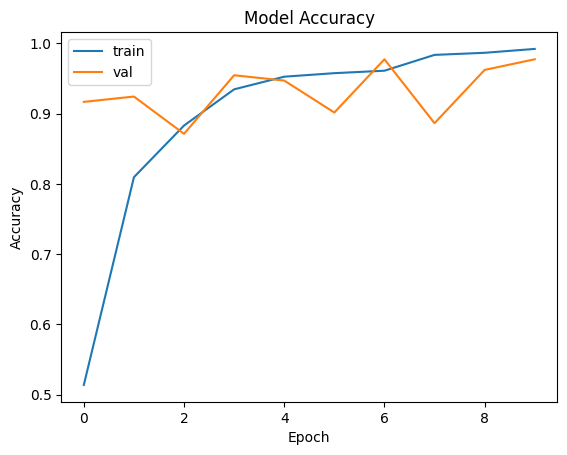

In [ ]:
# Plot the learning curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

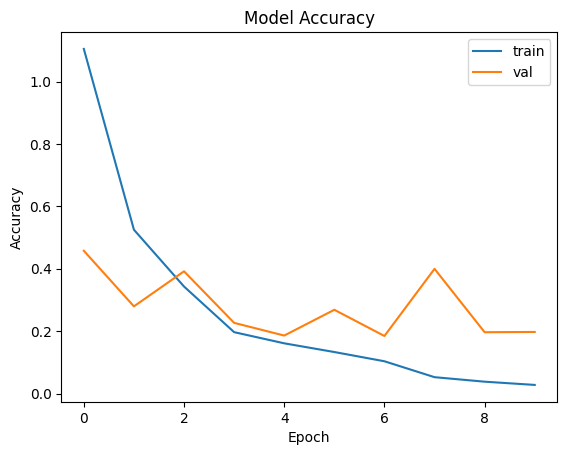

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
def plot_confusion_matrix(y_test, y_pred, labels, figsize=(8, 8)):
  """
    y_test: true y labels
    y_pred: predicted y labels
    labels: class labels
  """
  disp = ConfusionMatrixDisplay.from_predictions(y_test,
                                                 y_pred,
                                                 display_labels=labels,
                                                 cmap="Blues",
                                                 normalize='true')
  fig = disp.figure_
  fig.set_figwidth(figsize[1])
  fig.set_figheight(figsize[0])

In [ ]:
# Generate predictions on the test set
model.load_weights(checkpoint_path)
test_iterator.reset()
pred_probs = model.predict(test_iterator)
pred_labels = np.argmax(pred_probs, axis=1)

# Generate classification report and confusion matrix
true_labels = test_iterator.classes
class_names = list(test_iterator.class_indices.keys())
print(classification_report(true_labels, pred_labels, target_names=class_names))
confusion = confusion_matrix(true_labels, pred_labels)
print(confusion)


200/200 [==============================] - 15s 73ms/step
              precision    recall  f1-score   support

     cassava       0.93      1.00      0.96        50
       grass       1.00      1.00      1.00        50
       maize       1.00      0.98      0.99        50
   sugarcane       1.00      0.94      0.97        50

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

[[50  0  0  0]
 [ 0 50  0  0]
 [ 1  0 49  0]
 [ 3  0  0 47]]


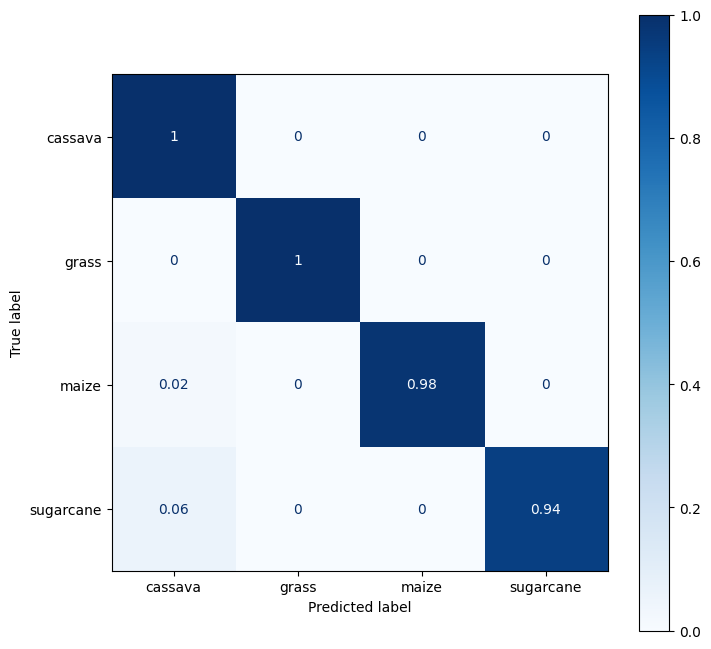

In [ ]:
plot_confusion_matrix( true_labels, pred_labels, class_names)